# Trabalho de Aprendizagem Computacional

Neste trabalho iremos abordar o K-NN e formas do modelo calcular a distância entre pontos e ver como isso afeta os dado. Iremos também experimentar com K's diferentes, mas sem nunca usarmos K's que sejam número par, porque isso pode levar a situações de empate indesejadas.

## Modelo Base K-NN e Distancias

Nesta parte do trabalho iremos introduzir o modelo de base do K-NN, um modelo de classificação que recorre ao cálculo da distância do ponto no espaço aos outros pontos no mesmo espaço após esse cálculo o modelo identifica os K pontos mais próximos e atribui a classificação mais observada nesses K pontos.
Iremos também introduzir as funções que mais tarde iremos usar para calcular as distâncias de forma diferente e ver como isso afeta a accuracy do modelo.
Uma breve apresentação das distâncias:
- Distância Euclidiana: Na distância euclidiana calculamos a distância através da repetida aplicação do teorema de pitágoras $$\sqrt{\sum_{i=0}^{n}(p_i-q_i)^2}$$
- Distância de Manhattan: Nesta forma a distância entre dois pontos é obtida atravès da soma das diferenças absolutas das suas coordenadas. $$P_1(x_1,y_2), P_2(x_2,y_2)\rightarrow\ D_{P_1P_2}=| x_1-x_2 |+|y_1-y_2|$$
- Distância de Chebyshev: Forma de calcular a distância onde se olha para cada eixo individualmente e se escolhe a distância como sendo a maior quando comparada com os outros eixos $$D(x,y)=max_i(|x_i-y_i|), \forall \mathbb{R}^i$$
- Distância de Canberra: Forma de calcular distância através de um vetor n-dimensional $$\sum_{i=0}^{n} \frac {|p_i-q_i|}{|p_i|+|q_i|}, {onde:\space}{ P(p_1,p_2,...,p_n),Q(q_1,q_2,...,q_n)}$$
- Distância de Cosine:$$\frac {\sum_{i=1}^{n} A_iB_i}{\sqrt{\sum_{i=1}^{n} A_i^2} * \sqrt{\sum_{i=1}^{n} B_i^2}} $$
- Distância de Jaccard: Coeficiente de similaridade em que se divide a probabilidade da interseção de dois eventos com a probabilidade da união de ambos. $$J(A,B)= \frac {|A\cap B|}{|A\cup B|}$$
- Distância de Minkowski: Métrica que pode ser considerada tanto a generalização da distância de Manhattan como da distância euclidiana. $$X(x_1,x_2,...,x_n)\space Y(y_1,y_2,...,y_n)$$ $$D(X,Y)=(\sum_{i=1}^{n} |x_i-y_i|^p)^{\frac {1}{p}}$$
- Variação de distância: também conhecida como distância estatística, e é uma medida para a probabilidade de distribuições $$\delta(P,Q)=sup_{A\in F}|P(A)-Q(A)|$$

In [1]:
import numpy as np
from collections import Counter

#Funcoes de Apoio

def distancia_euclidiana(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def distancia_manhattan(a, b):
    return np.sum(np.abs(a - b))
    
def distancia_chebyshev(x1, x2):
    return np.max(np.abs(x1 - x2))

def distancia_canberra(x1, x2):
    return np.sum(np.abs(x1 - x2) / (np.abs(x1) + np.abs(x2)))

def distancia_cosine(x1, x2):
    return np.dot(x1, x2) / (np.sqrt(np.dot(x1, x1)) * np.sqrt(np.dot(x2, x2)))

def distancia_jaccard(x1, x2):
    return 1 - (np.sum(np.minimum(x1, x2)) / np.sum(np.maximum(x1, x2)))

def distancia_minkowski(x1, x2, p=1):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
    
def distancia_variation(x1, x2):
    return np.sum(np.abs(x1 - x2)) / np.sum(np.minimum(x1, x2))
    
def accuracy(y, y_prv):
    return np.sum(y== y_prv) / len(y)

class K_NearestNeighbours:
    
    def __init__(self, k=3, distancia= distancia_euclidiana):
        self.k=k
        if (self.k%2)==0:
            self.k+=1
        self.distancia= distancia

    def treinar_modelo(self, X, y):
        self.X_treino= X
        self.y_treino= y

    def predictions_array(self, X): #responsavel por fazer o array com todas as previsoes atraves de dar call 
        X= np.array(X)
        y_pred= [self._PredictForX(x) for x in X]
        return np.array(y_pred)

    def _PredictForX(self, x):
        distancias= [self.distancia(x, x_treino) for x_treino in self.X_treino]
        index_NNs= np.argsort(distancias)[: self.k] 
        index_labels= np.take(self.y_treino, index_NNs)

        if np.size(index_labels) > 0:
            return Counter(index_labels).most_common(1)[0][0]
        else:
            raise Exception(f"{self.k}Nearest Neighbours are not Labelled (Data in indices {index_NNs})")


## Primeiro Dataset

### Abrir Dataset 

In [2]:
import pandas as pd
import openml

dataset= openml.datasets.get_dataset(31)
X, Y, categorical_indicator, attribute_names= dataset.get_data(dataset_format="array", target=dataset.default_target_attribute)

dataframe= pd.DataFrame(X, columns=attribute_names)
dataframe["target"]= Y
dataframe

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,...,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,...,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,1
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,...,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,...,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,...,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,2.0,2.0,1736.0,0.0,3.0,3.0,1.0,0.0,...,0.0,31.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0
996,0.0,30.0,2.0,1.0,3857.0,0.0,2.0,4.0,0.0,0.0,...,1.0,40.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0,0
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,...,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0
998,0.0,45.0,2.0,3.0,1845.0,0.0,2.0,4.0,2.0,0.0,...,3.0,23.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1


### Visualização do Target

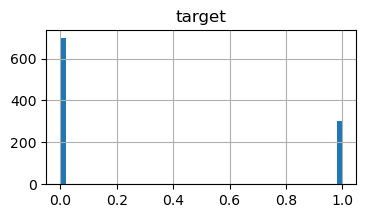

target
0    700
1    300
Name: count, dtype: int64

In [3]:
import matplotlib.pyplot as  plt
dataframe.hist(column="target",bins=50, figsize=(4,2))
plt.show()
dataframe["target"].value_counts()

### Breve Analise

Como podemos ver pelo histograma, o dataset contém cerca de 1/3 dos casos em que o target é positivo e os restantes 2/3 é negativo, o dataset tem 1000 linhas com cerca de 20 features.

### Divisão dos Dados

Iremos efetuar a divisão destes dados com um split de 80% de treino para 20% de teste.

In [4]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

### Distância Euclidiana (Modelo de Base)

In [5]:
acc_distancia_euclidiana= []
index=[]
for k in range (3,25,2):
    modelo_euclidiana = K_NearestNeighbours(k)
    modelo_euclidiana.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_euclidiana.predictions_array(X_teste)
    acc_distancia_euclidiana.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_euclidiana)
print(index)

[0.625, 0.685, 0.675, 0.67, 0.67, 0.67, 0.685, 0.69, 0.705, 0.695, 0.705]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência dos K

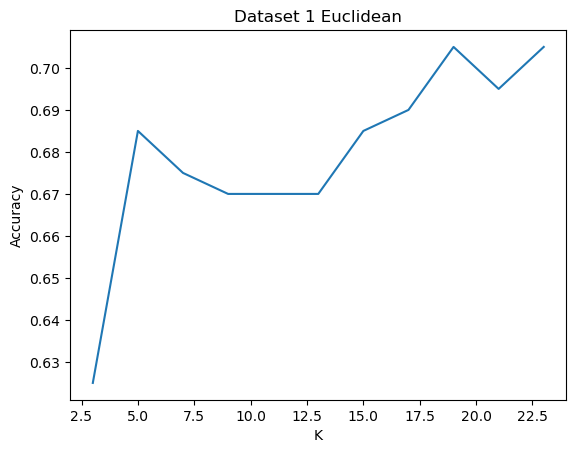

In [6]:
plt.plot(index, acc_distancia_euclidiana)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Euclidean")
plt.show()

### Distância de Manhattan

In [7]:
acc_distancia_manhattan= []
index=[]
for k in range (3,25,2):
    modelo_manhattan = K_NearestNeighbours(k, distancia=distancia_manhattan)
    modelo_manhattan.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_manhattan.predictions_array(X_teste)
    acc_distancia_manhattan.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_manhattan)
print(index)

[0.645, 0.695, 0.705, 0.7, 0.7, 0.715, 0.69, 0.695, 0.705, 0.705, 0.705]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do k

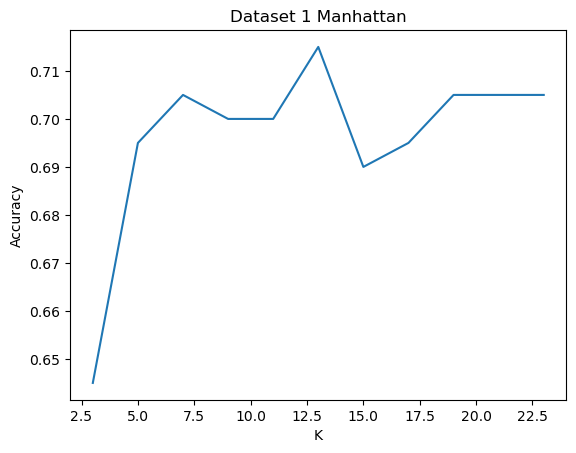

In [8]:
plt.plot(index, acc_distancia_manhattan)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Manhattan")
plt.show()

### Distância de Chebyshev

In [9]:
acc_distancia_chebyshev= []
index=[]
for k in range (3,25,2):
    modelo_chebyshev = K_NearestNeighbours(k, distancia= distancia_chebyshev)
    modelo_chebyshev.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_chebyshev.predictions_array(X_teste)
    acc_distancia_chebyshev.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_chebyshev)
print(index)

[0.62, 0.645, 0.66, 0.65, 0.66, 0.665, 0.685, 0.69, 0.7, 0.695, 0.71]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

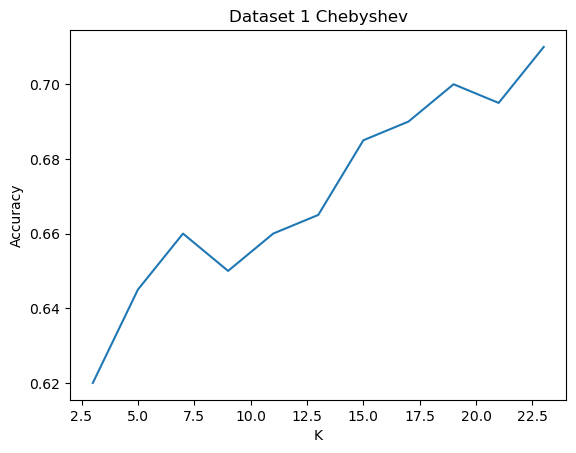

In [10]:
plt.plot(index, acc_distancia_chebyshev)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Chebyshev")
plt.show()

### Distância de Canberra

In [11]:
acc_distancia_canberra= []
index=[]
for k in range (3,25,2):
    modelo_canberra = K_NearestNeighbours(k, distancia=distancia_canberra)
    modelo_canberra.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_canberra.predictions_array(X_teste)
    acc_distancia_canberra.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_canberra)
print(index)

C:\Users\alexa\AppData\Local\Temp\ipykernel_16312\2886328899.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sum(np.abs(x1 - x2) / (np.abs(x1) + np.abs(x2)))


[0.69, 0.695, 0.7, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705, 0.705]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

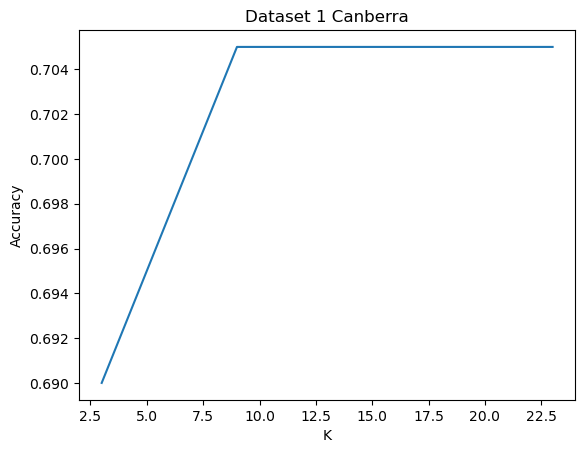

In [12]:
plt.plot(index, acc_distancia_canberra)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Canberra")
plt.show()

### Distância de Cosine

In [13]:
acc_distancia_cosine= []
index=[]
for k in range (3,25,2):
    modelo_cosine = K_NearestNeighbours(k, distancia=distancia_cosine)
    modelo_cosine.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_cosine.predictions_array(X_teste)
    acc_distancia_cosine.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_cosine)
print(index)

[0.7, 0.7, 0.7, 0.7, 0.7, 0.705, 0.685, 0.695, 0.685, 0.685, 0.675]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

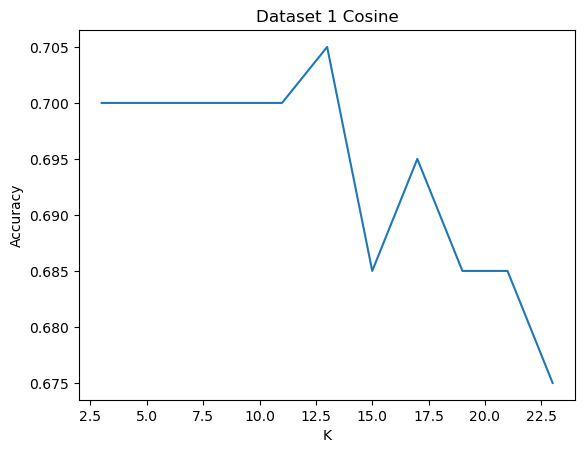

In [14]:
plt.plot(index, acc_distancia_cosine)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Cosine")
plt.show()

### Distância de Jaccard

In [15]:
acc_distancia_jaccard= []
index=[]
for k in range (3,25,2):
    modelo_jaccard = K_NearestNeighbours(k, distancia=distancia_jaccard)
    modelo_jaccard.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_jaccard.predictions_array(X_teste)
    acc_distancia_jaccard.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_jaccard)
print(index)

[0.64, 0.69, 0.705, 0.705, 0.715, 0.715, 0.7, 0.69, 0.7, 0.7, 0.705]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

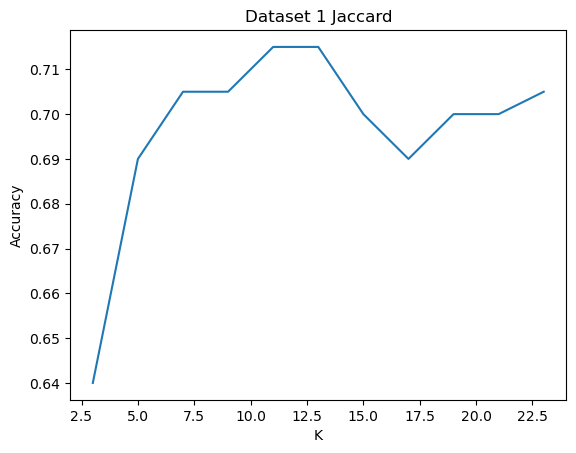

In [16]:
plt.plot(index, acc_distancia_jaccard)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Jaccard")
plt.show()

### Distância de Minkowski

In [17]:
acc_distancia_minkowski= []
index=[]
for k in range (3,25,2):
    modelo_minkowski = K_NearestNeighbours(k, distancia= distancia_minkowski)
    modelo_minkowski.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_minkowski.predictions_array(X_teste)
    acc_distancia_minkowski.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_minkowski)
print(index)

[0.645, 0.695, 0.705, 0.7, 0.7, 0.715, 0.69, 0.695, 0.705, 0.705, 0.705]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

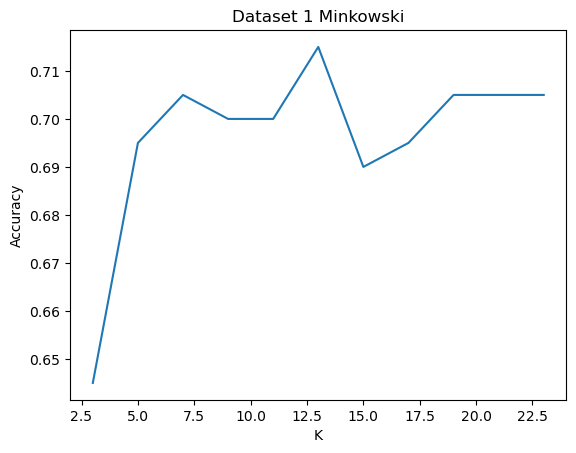

In [18]:
plt.plot(index, acc_distancia_minkowski)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Minkowski")
plt.show()

### Distância Variation

In [19]:
acc_distancia_variation= []
index=[]
for k in range (3,25,2):
    modelo_variation = K_NearestNeighbours(k, distancia=distancia_variation)
    modelo_variation.treinar_modelo(X_treino, Y_treino)
    predictions = modelo_variation.predictions_array(X_teste)
    acc_distancia_variation.append(accuracy(Y_teste, predictions))
    index.append(k)
print(acc_distancia_variation)
print(index)

[0.64, 0.69, 0.705, 0.705, 0.715, 0.715, 0.7, 0.69, 0.7, 0.7, 0.705]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

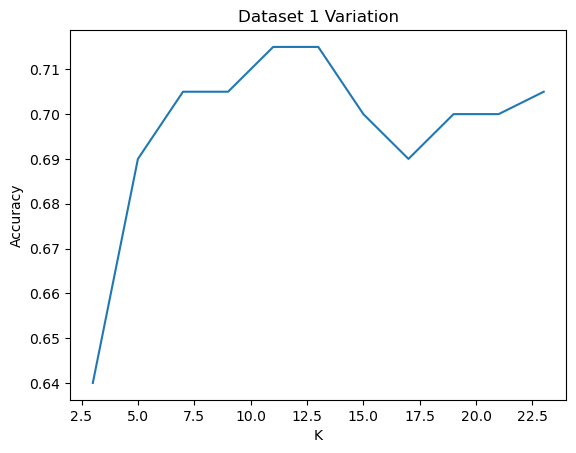

In [20]:
plt.plot(index, acc_distancia_variation)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 1 Variation")
plt.show()

### Comparação das diferentes distâncias

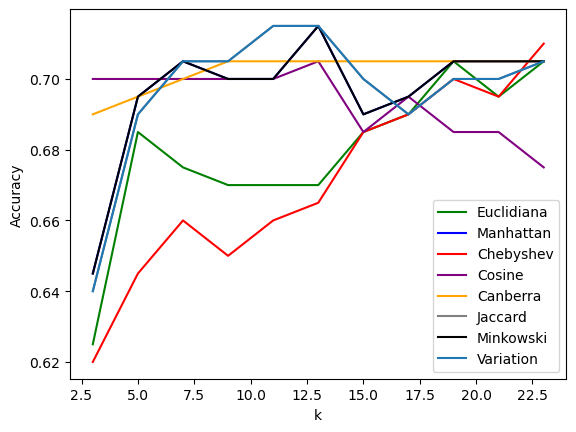

In [43]:
fig, ax = plt.subplots()
ax.plot(index, acc_distancia_euclidiana, color = "green",label="Euclidiana")
ax.plot(index, acc_distancia_manhattan, color="blue", label="Manhattan")
ax.plot(index, acc_distancia_chebyshev, color="red", label="Chebyshev")
ax.plot(index, acc_distancia_cosine, color="purple", label="Cosine")
ax.plot(index, acc_distancia_canberra, color="orange", label="Canberra")
ax.plot(index, acc_distancia_jaccard, color="grey", label="Jaccard")
ax.plot(index, acc_distancia_minkowski, color = "black",label="Minkowski")
ax.plot(index, acc_distancia_variation, label="Variation")
ax.set(xlabel="k",ylabel="Accuracy")
ax.legend()
plt.show()

### Conclusão Dataset 1

Como podemos ver, todas as formas de medir as distâncias dos pontos produzem resultados ligeiramente diferentes, mas eventualmente todas tendem a convergir para 70.5% de accuracy com o aumentar do k, o que nos leva a suspeitar que a partir de um certo valor de k, acabamos por ter o modelo a analisar uma área tão grande do espaço dimensional que os resultados deixam de ser tão fiáveis, apesar da accuracy aumentar.
A distância de Minkowski e a variação da distância, foram os dois métodos que melhores valores alcançaram, com 71.5% de accuracy.
Por fim, ao usarmos um dataset com tantos features, acabamos por mostrar uma das fraquezas do K-NN, apelidada de "Maldição da Dimensionalidade". Algo que podemos observar pelas baixas accuracys, pois 60%-70% não é impressionante.

## Segundo Dataset

### Abrir Dataset

In [22]:
dataset2= openml.datasets.get_dataset(934)
X2, Y2, categorical_indicator2, attribute_names2= dataset2.get_data(dataset_format="array", target=dataset2.default_target_attribute)

dataframe2= pd.DataFrame(X2, columns=attribute_names2)
dataframe2["target"]= Y2
dataframe2

,fathers_occupation,sons_occupation,family_structure,race,counts_for_sons_first_occupation,target
0,12.0,12.0,0.0,1.0,22.900000,1
1,12.0,11.0,0.0,1.0,96.199997,1
2,12.0,8.0,0.0,1.0,18.100000,1
3,12.0,14.0,0.0,1.0,8.900000,0
4,12.0,13.0,0.0,1.0,2.800000,0
...,...,...,...,...,...,...
1151,4.0,9.0,1.0,0.0,6.700000,0
1152,4.0,6.0,1.0,0.0,4.000000,0
1153,4.0,7.0,1.0,0.0,8.500000,0
1154,4.0,5.0,1.0,0.0,1.700000,0


### Visualização do Target

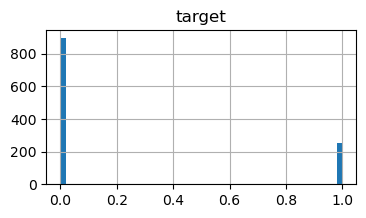

target
0    900
1    256
Name: count, dtype: int64

In [23]:
dataframe2.hist(column="target",bins=50, figsize=(4,2))
plt.show()
dataframe2["target"].value_counts()

### Breve Análise

Este dataset tal como o primeiro tem cerca de 1000 linhas, mas desta vez tem menos features, apresentando só 8.
O tipo das variáveis também e em sua maioria iguais às do primeiro dataset.
A maior diferença sem ser as features, surge na relação de positivos para negativos na nossa coluna de target sendo que temos desta vez cerca de 20% de positivos em comparação aos 33% do dataset 1.

### Divisão dos Dados

In [24]:
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

### Distância Euclidiana (Modelo de Base)

In [25]:
acc_distancia_euclidiana2= []
index=[]
for k in range (3,25,2):
    modelo_euclidiana2 = K_NearestNeighbours(k)
    modelo_euclidiana2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_euclidiana2.predictions_array(X_teste2)
    acc_distancia_euclidiana2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_euclidiana2)
print(index)

[0.9181034482758621, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9181034482758621, 0.9137931034482759, 0.9224137931034483, 0.9224137931034483, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência dos K

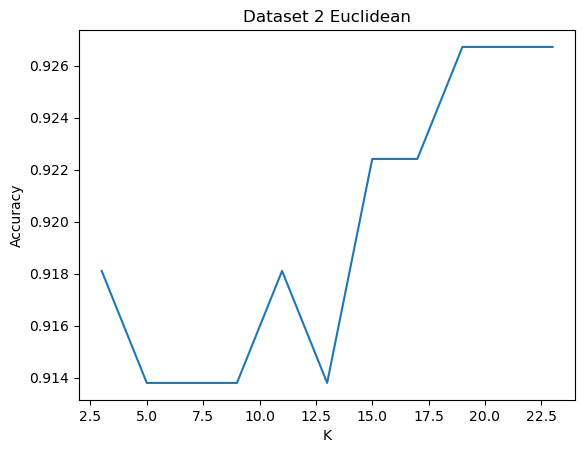

In [26]:
plt.plot(index, acc_distancia_euclidiana2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Euclidean")
plt.show()

### Distância de Manhattan

In [27]:
acc_distancia_manhattan2= []
index=[]
for k in range (3,25,2):
    modelo_manhattan2= K_NearestNeighbours(k, distancia=distancia_manhattan)
    modelo_manhattan2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_manhattan2.predictions_array(X_teste2)
    acc_distancia_manhattan2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_manhattan2)
print(index)


[0.9137931034482759, 0.9267241379310345, 0.9224137931034483, 0.9137931034482759, 0.9224137931034483, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do k

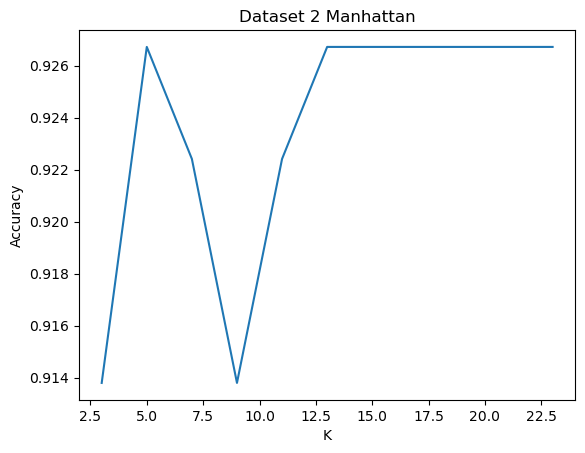

In [28]:
plt.plot(index, acc_distancia_manhattan2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Manhattan")
plt.show()

### Distância de Chebyshev

In [29]:
acc_distancia_chebyshev2= []
index=[]
for k in range (3,25,2):
    modelo_chebyshev2 = K_NearestNeighbours(k, distancia= distancia_chebyshev)
    modelo_chebyshev2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_chebyshev2.predictions_array(X_teste2)
    acc_distancia_chebyshev2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_chebyshev2)
print(index)

[0.9137931034482759, 0.9137931034482759, 0.9137931034482759, 0.9181034482758621, 0.9224137931034483, 0.9224137931034483, 0.9181034482758621, 0.9224137931034483, 0.9224137931034483, 0.9267241379310345, 0.9267241379310345]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

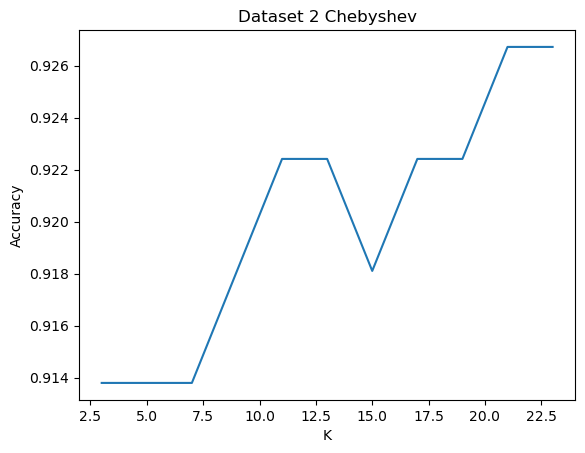

In [30]:
plt.plot(index, acc_distancia_chebyshev2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Chebyshev")
plt.show()

### Distância de Canberra

In [31]:
acc_distancia_canberra2= []
index=[]
for k in range (3,25,2):
    modelo_canberra2 = K_NearestNeighbours(k, distancia=distancia_canberra)
    modelo_canberra2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_canberra2.predictions_array(X_teste2)
    acc_distancia_canberra2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_canberra2)
print(index)

C:\Users\alexa\AppData\Local\Temp\ipykernel_16312\2886328899.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sum(np.abs(x1 - x2) / (np.abs(x1) + np.abs(x2)))


[0.9051724137931034, 0.8922413793103449, 0.9008620689655172, 0.896551724137931, 0.9051724137931034, 0.896551724137931, 0.9051724137931034, 0.896551724137931, 0.896551724137931, 0.8922413793103449, 0.875]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

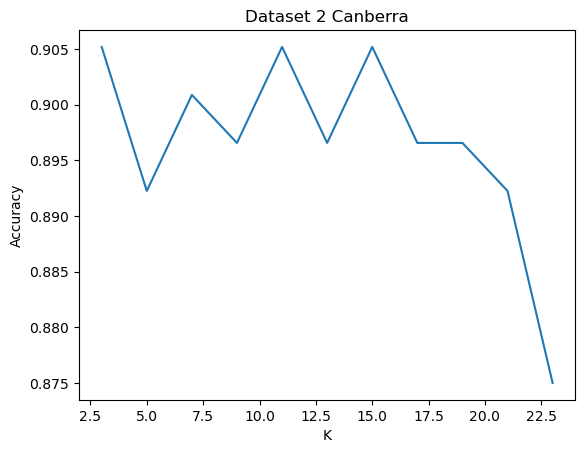

In [32]:
plt.plot(index, acc_distancia_canberra2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Canberra")
plt.show()

### Distância de Cosine

In [33]:
acc_distancia_cosine2= []
index=[]
for k in range (3,25,2):
    modelo_cosine2 = K_NearestNeighbours(k, distancia=distancia_cosine)
    modelo_cosine2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_cosine2.predictions_array(X_teste2)
    acc_distancia_cosine2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_cosine2)
print(index)

[0.3577586206896552, 0.31896551724137934, 0.3017241379310345, 0.2974137931034483, 0.3017241379310345, 0.2974137931034483, 0.2974137931034483, 0.2974137931034483, 0.2974137931034483, 0.2974137931034483, 0.2974137931034483]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

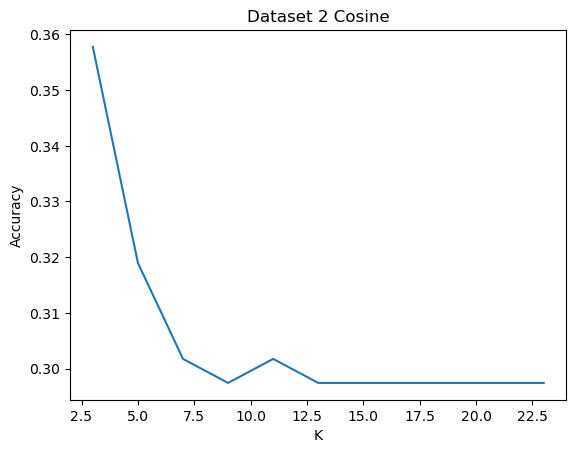

In [34]:
plt.plot(index, acc_distancia_cosine2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Cosine")
plt.show()

### Distância de Jaccard

In [35]:
acc_distancia_jaccard2= []
index=[]
for k in range (3,25,2):
    modelo_jaccard2 = K_NearestNeighbours(k, distancia=distancia_jaccard)
    modelo_jaccard2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_jaccard2.predictions_array(X_teste2)
    acc_distancia_jaccard2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_jaccard2)
print(index)

[0.9094827586206896, 0.9267241379310345, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

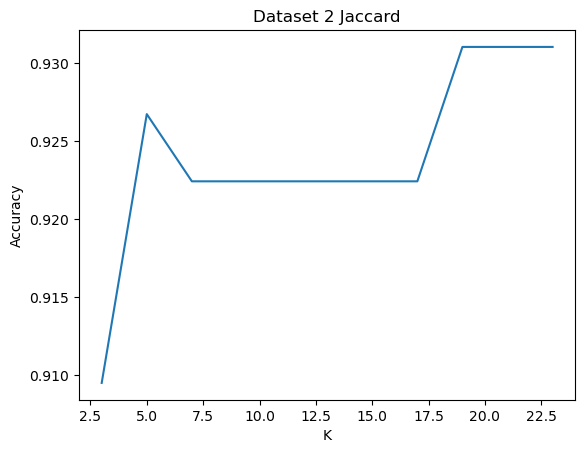

In [36]:
plt.plot(index, acc_distancia_jaccard2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Jaccard")
plt.show()

### Distância de Minkowski

In [37]:
acc_distancia_minkowski2= []
index=[]
for k in range (3,25,2):
    modelo_minkowski2 = K_NearestNeighbours(k, distancia= distancia_minkowski)
    modelo_minkowski2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_minkowski2.predictions_array(X_teste2)
    acc_distancia_minkowski2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_minkowski2)
print(index)

[0.9137931034482759, 0.9267241379310345, 0.9224137931034483, 0.9137931034482759, 0.9224137931034483, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345, 0.9267241379310345]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

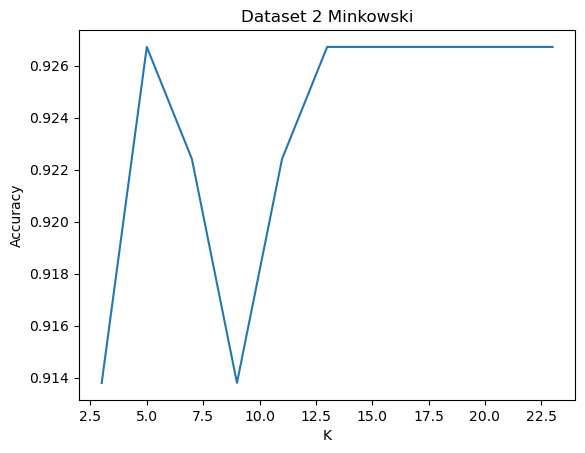

In [38]:
plt.plot(index, acc_distancia_minkowski2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Minkowski")
plt.show()

### Distância Variation

In [39]:
acc_distancia_variation2= []
index=[]
for k in range (3,25,2):
    modelo_variation2 = K_NearestNeighbours(k, distancia=distancia_variation)
    modelo_variation2.treinar_modelo(X_treino2, Y_treino2)
    predictions = modelo_variation2.predictions_array(X_teste2)
    acc_distancia_variation2.append(accuracy(Y_teste2, predictions))
    index.append(k)
print(acc_distancia_variation2)
print(index)

C:\Users\alexa\AppData\Local\Temp\ipykernel_16312\2886328899.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(x1 - x2)) / np.sum(np.minimum(x1, x2))


[0.9094827586206896, 0.9267241379310345, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9224137931034483, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


#### Visualização da Inferência do K

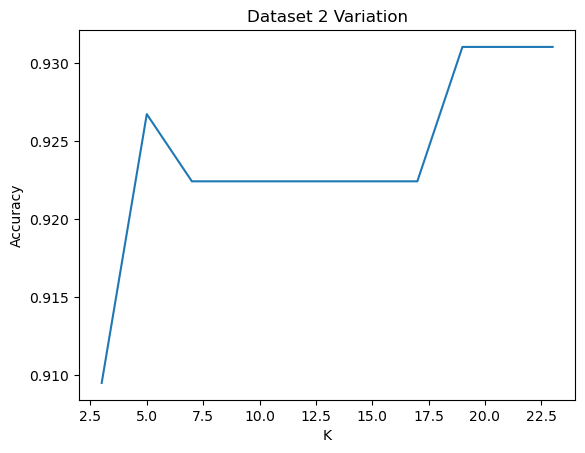

In [40]:
plt.plot(index, acc_distancia_variation2)
plt.xlabel("K")  
plt.ylabel("Accuracy") 
plt.title("Dataset 2 Variation")
plt.show()

### Comparação das diferentes distâncias dataset 2

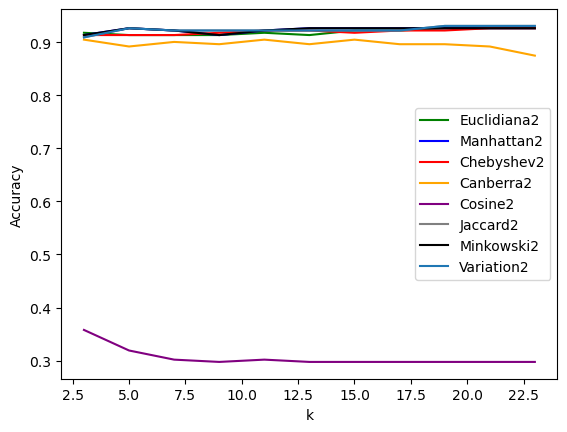

In [48]:
fig, ax = plt.subplots()
ax.plot(index, acc_distancia_euclidiana2, color = "green",label="Euclidiana2")
ax.plot(index, acc_distancia_manhattan2, color="blue", label="Manhattan2")
ax.plot(index, acc_distancia_chebyshev2, color="red", label="Chebyshev2")
ax.plot(index, acc_distancia_canberra2, color="orange", label="Canberra2")
ax.plot(index, acc_distancia_cosine2, color="purple", label="Cosine2")
ax.plot(index, acc_distancia_jaccard2, color="grey", label="Jaccard2")
ax.plot(index, acc_distancia_minkowski2, color = "black",label="Minkowski2")
ax.plot(index, acc_distancia_variation2, label="Variation2")
ax.set(xlabel="k",ylabel="Accuracy")
ax.legend()
plt.show()

### Conclusão Dataset 2

Mais uma vez podemos observar que todas as formas de calcular produzem resultados ligeiramente diferentes, mas todas à volta dos 90%-93%, com a Cosine a ser um claro outlier neste dataset, tendo a accuracy mais fraca de longe, com cerca de 30%. A Canberra também se destaca mas porque ao contrário das outras com o aumentar do K a accuracy diminui.
Os valores da accuracy mais uma vez aumentam com o aumentar do K, mas muitas vezes atingem plateau's antes do K max, o que nos prova que a accuracy aumentar com o k, não é necessariamente bom sinal e que provavelmente teríamos um modelo mais fiável com um k mais baixo. Neste dataset, mais uma vez, a forma de calcular a distância que apresenta melhor resultado, é a de Minkowski e a forma da variação estatística, com 93%.

## Conclusão Final e a " Maldição da Dimensionalidade"

Ao finalizarmos este trabalho, podemos tirar a conclusão de que, a escolha certa da forma de medir a distância entre os pontos, pode ser uma boa forma de ajustar o modelo, se o que estivermos a procurar forem pontos precentuais. Não são alterações que revolucionam completamente o modelo, mas servem de uma ligeira afinação.

Concluimos também através do uso de datasets com muitas e com poucas features, que para o K-NN é desvantajoso esse número elevado de features, que só serve para confundir o modelo ("Maldição da Dimensionalidade"). O facto de usarmos dois datasets com variáveis do mesmo tipo, e com um número parecido de entries, permite-nos ter uma certa certeza dessa afirmação, como é comprovada pelos 20% de diferença média de accuracy. Levando então a que seja necessário, ou a utilização de um modelo diferente do K-NN, quando se lida com datasets com muitas features, ou então de uma limpeza ponderada das features consideradas mais irrelevantes.

A nível do K, como referimos anteriormente, parece nos lógico a utilização de apenas valores ímpares, evitando casos de empate acidentais, e verificamos que apesar de parecer aumentar a accuracy, esse aumento levado pelo aumento do K nunca pode ser muito confiado e achamos melhor a deixar o K pelo valor mais usualmente usado, sendo esse o 3 ou então por um valor não muito distante.